## Import Dependencies

In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

## Create Dataframe

In [249]:
game_data = pd.read_csv('vgsales.csv')
game_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [250]:
game_data.Name.value_counts()

Name
Need for Speed: Most Wanted                12
Ratatouille                                 9
FIFA 14                                     9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Ar tonelico Qoga: Knell of Ar Ciel          1
Galaga: Destination Earth                   1
Nintendo Presents: Crossword Collection     1
TrackMania: Build to Race                   1
Know How 2                                  1
Name: count, Length: 11493, dtype: int64

## Data Preprocessing

In [251]:
# Drop rows we don't need
rows_dropped = game_data.groupby(['Name', 'Publisher']).filter(lambda x: len(x) <= 3).index
game_data = game_data[~game_data.index.isin(rows_dropped)]

In [252]:
game_data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
...,...,...,...,...,...,...,...,...,...,...,...
16553,16556,Bound By Flame,X360,2014.0,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
16558,16561,Pro Evolution Soccer 2008,PC,2007.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01
16563,16566,Mortal Kombat: Deadly Alliance,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01
16576,16579,Rugby Challenge 3,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01


In [253]:
game_data.Name.value_counts()

Name
Need for Speed: Most Wanted                                12
Ratatouille                                                 9
LEGO Marvel Super Heroes                                    9
FIFA 14                                                     9
Madden NFL 07                                               8
                                                           ..
SpongeBob SquarePants: Game Boy Advance Video Volume 2      1
Disney Channel Collection Vol. 1                            1
The Fairly Odd Parents: Game Boy Advance Video Volume 2     1
Atsumare! Power Pro Kun no DS Koushien                      1
Bound By Flame                                              1
Name: count, Length: 571, dtype: int64

In [255]:
game_data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [256]:
game_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2466 entries, 16 to 16595
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          2466 non-null   int64  
 1   Name          2466 non-null   object 
 2   Platform      2466 non-null   object 
 3   Year          2466 non-null   float64
 4   Genre         2466 non-null   object 
 5   Publisher     2466 non-null   object 
 6   NA_Sales      2466 non-null   float64
 7   EU_Sales      2466 non-null   float64
 8   JP_Sales      2466 non-null   float64
 9   Other_Sales   2466 non-null   float64
 10  Global_Sales  2466 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 231.2+ KB


In [257]:
game_data.Name.value_counts()

Name
Need for Speed: Most Wanted     12
Ratatouille                      9
FIFA 14                          9
LEGO Marvel Super Heroes         9
The LEGO Movie Videogame         8
                                ..
FIFA Soccer 2004                 3
Madden NFL 2004                  3
GRID                             2
LEGO Harry Potter: Years 5-7     1
Happy Feet Two                   1
Name: count, Length: 513, dtype: int64

In [258]:
game_data.Publisher.value_counts()

Publisher
Electronic Arts                           549
Activision                                498
Ubisoft                                   203
THQ                                       177
Warner Bros. Interactive Entertainment    127
Take-Two Interactive                      114
Disney Interactive Studios                 96
Konami Digital Entertainment               85
Sega                                       72
D3Publisher                                47
LucasArts                                  44
Namco Bandai Games                         42
Vivendi Games                              41
Eidos Interactive                          36
Capcom                                     35
505 Games                                  24
MTV Games                                  24
Square Enix                                23
Acclaim Entertainment                      20
Telltale Games                             19
Midway Games                               16
Bethesda Softworks      

In [259]:
game_data.Platform.value_counts()

Platform
X360    379
PS3     351
PS2     268
Wii     241
DS      191
PC      166
PSP     145
XB      127
GC      124
PS4     106
XOne    102
GBA      93
3DS      64
WiiU     59
PSV      40
PS        6
N64       3
GB        1
Name: count, dtype: int64

## Data Encoding

In [260]:
game_data = pd.concat([game_data.drop('Name', axis=1), pd.get_dummies(game_data.Name).add_prefix('name_')], axis=1)

In [261]:
game_data

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,name_X-Men Legends II: Rise of Apocalypse,name_X-Men Origins: Wolverine,name_X-Men: Destiny,name_X-Men: The Official Game,name_X2: Wolverine's Revenge,name_You Don't Know Jack,name_Young Justice: Legacy,name_Zapper: One Wicked Cricket!,name_de Blob 2,name_pro evolution soccer 2011
16,17,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40,...,False,False,False,False,False,False,False,False,False,False
17,18,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81,...,False,False,False,False,False,False,False,False,False,False
23,24,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,...,False,False,False,False,False,False,False,False,False,False
29,30,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,...,False,False,False,False,False,False,False,False,False,False
31,32,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16517,16520,Wii,2007.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,...,False,False,False,False,False,False,False,False,False,False
16558,16561,PC,2007.0,Sports,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,...,False,False,False,False,False,False,False,False,False,False
16563,16566,GBA,2002.0,Fighting,Midway Games,0.01,0.00,0.00,0.00,0.01,...,False,False,False,False,False,False,False,False,False,False
16576,16579,XOne,2016.0,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01,...,False,False,False,False,False,False,False,False,False,False


In [262]:
game_data = pd.concat([game_data.drop('Publisher', axis=1), pd.get_dummies(game_data.Publisher).add_prefix('publisher_')], axis=1)
game_data = pd.concat([game_data.drop('Genre', axis=1), pd.get_dummies(game_data.Genre).add_prefix('genre_')], axis=1)
game_data = pd.concat([game_data.drop('Platform', axis=1), pd.get_dummies(game_data.Platform).add_prefix('platform_')], axis=1)

In [263]:
game_data

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,name_007: Quantum of Solace,name_2010 FIFA World Cup South Africa,name_AC/DC LIVE: Rock Band Track Pack,...,platform_PS2,platform_PS3,platform_PS4,platform_PSP,platform_PSV,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
16,17,2013.0,7.01,9.27,0.97,4.14,21.40,False,False,False,...,False,True,False,False,False,False,False,False,False,False
17,18,2004.0,9.43,0.40,0.41,10.57,20.81,False,False,False,...,True,False,False,False,False,False,False,False,False,False
23,24,2013.0,9.63,5.31,0.06,1.38,16.38,False,False,False,...,False,False,False,False,False,False,False,True,False,False
29,30,2011.0,9.03,4.28,0.13,1.32,14.76,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31,32,2010.0,9.67,3.73,0.11,1.13,14.64,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16517,16520,2007.0,0.00,0.01,0.00,0.00,0.01,False,False,False,...,False,False,False,False,False,True,False,False,False,False
16558,16561,2007.0,0.00,0.01,0.00,0.00,0.01,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16563,16566,2002.0,0.01,0.00,0.00,0.00,0.01,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16576,16579,2016.0,0.00,0.01,0.00,0.00,0.01,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [264]:
game_data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,name_007: Quantum of Solace,name_2010 FIFA World Cup South Africa,name_AC/DC LIVE: Rock Band Track Pack,...,platform_PS2,platform_PS3,platform_PS4,platform_PSP,platform_PSV,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
Rank,1.000000,0.051865,-0.493485,-0.441782,-0.210339,-0.334085,-0.508360,-0.005224,-0.028939,0.009996,...,-0.147575,-0.113433,-0.092908,0.004758,0.061358,-0.055014,0.061005,-0.096576,0.031219,0.008507
Year,0.051865,1.000000,-0.039098,0.086982,0.088498,0.021557,0.023883,-0.015667,0.008497,-0.012787,...,-0.273139,0.180565,0.294888,-0.073829,0.147420,0.011332,0.175228,0.137630,-0.311285,0.289503
NA_Sales,-0.493485,-0.039098,1.000000,0.644451,0.302754,0.611099,0.909580,-0.005073,-0.008185,-0.010865,...,0.089040,0.026387,0.040075,-0.067948,-0.054118,0.004746,-0.050051,0.135835,-0.016528,0.018466
EU_Sales,-0.441782,0.086982,0.644451,1.000000,0.473873,0.567116,0.872447,-0.001959,0.008205,-0.016130,...,0.010665,0.132584,0.149922,-0.046226,-0.027569,-0.025332,-0.037814,0.042688,-0.050252,-0.002012
JP_Sales,-0.210339,0.088498,0.302754,0.473873,1.000000,0.471465,0.488692,-0.004533,0.013824,-0.008222,...,0.014069,0.205396,0.103137,-0.004280,-0.000261,-0.056562,-0.022558,-0.056840,-0.047532,-0.039973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
platform_Wii,-0.055014,0.011332,0.004746,-0.025332,-0.056562,-0.042030,-0.019336,0.011465,0.020669,0.020669,...,-0.114920,-0.134073,-0.069749,-0.082260,-0.042260,1.000000,-0.051527,-0.140250,-0.076689,-0.068363
platform_WiiU,0.061005,0.175228,-0.050051,-0.037814,-0.022558,-0.037533,-0.049575,-0.007732,-0.006311,-0.006311,...,-0.054669,-0.063780,-0.033181,-0.039132,-0.020104,-0.051527,1.000000,-0.066719,-0.036482,-0.032521
platform_X360,-0.096576,0.137630,0.135835,0.042688,-0.056840,-0.016077,0.079684,0.001777,0.010764,0.010764,...,-0.148803,-0.173603,-0.090314,-0.106514,-0.054720,-0.140250,-0.066719,1.000000,-0.099299,-0.088519
platform_XB,0.031219,-0.311285,-0.016528,-0.050252,-0.047532,-0.060421,-0.043795,-0.011508,-0.009392,-0.009392,...,-0.081366,-0.094926,-0.049384,-0.058242,-0.029921,-0.076689,-0.036482,-0.099299,1.000000,-0.048402


## Correlation Visualization

In [265]:
# Grab data that is most correlated with the target value
correlations = game_data.corr()['Global_Sales'].abs()
sorted_correlations = correlations.sort_values()
num_dropped_col = int(0.8 * len(game_data.columns))
col_to_drop = sorted_correlations.iloc[:num_dropped_col].index
game_data_dropped = game_data.drop(col_to_drop, axis=1)

In [266]:
game_data_dropped

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,name_Adventure Time: Finn & Jake Investigations,name_Assassin's Creed III,name_Assassin's Creed IV: Black Flag,...,platform_PC,platform_PS,platform_PS2,platform_PS3,platform_PS4,platform_PSP,platform_PSV,platform_WiiU,platform_X360,platform_XB
16,17,2013.0,7.01,9.27,0.97,4.14,21.40,False,False,False,...,False,False,False,True,False,False,False,False,False,False
17,18,2004.0,9.43,0.40,0.41,10.57,20.81,False,False,False,...,False,False,True,False,False,False,False,False,False,False
23,24,2013.0,9.63,5.31,0.06,1.38,16.38,False,False,False,...,False,False,False,False,False,False,False,False,True,False
29,30,2011.0,9.03,4.28,0.13,1.32,14.76,False,False,False,...,False,False,False,False,False,False,False,False,True,False
31,32,2010.0,9.67,3.73,0.11,1.13,14.64,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16517,16520,2007.0,0.00,0.01,0.00,0.00,0.01,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16558,16561,2007.0,0.00,0.01,0.00,0.00,0.01,False,False,False,...,True,False,False,False,False,False,False,False,False,False
16563,16566,2002.0,0.01,0.00,0.00,0.00,0.01,False,False,False,...,False,False,False,False,False,False,False,False,False,False
16576,16579,2016.0,0.00,0.01,0.00,0.00,0.01,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [267]:
game_data_dropped.dropna(inplace=True)

<Axes: >

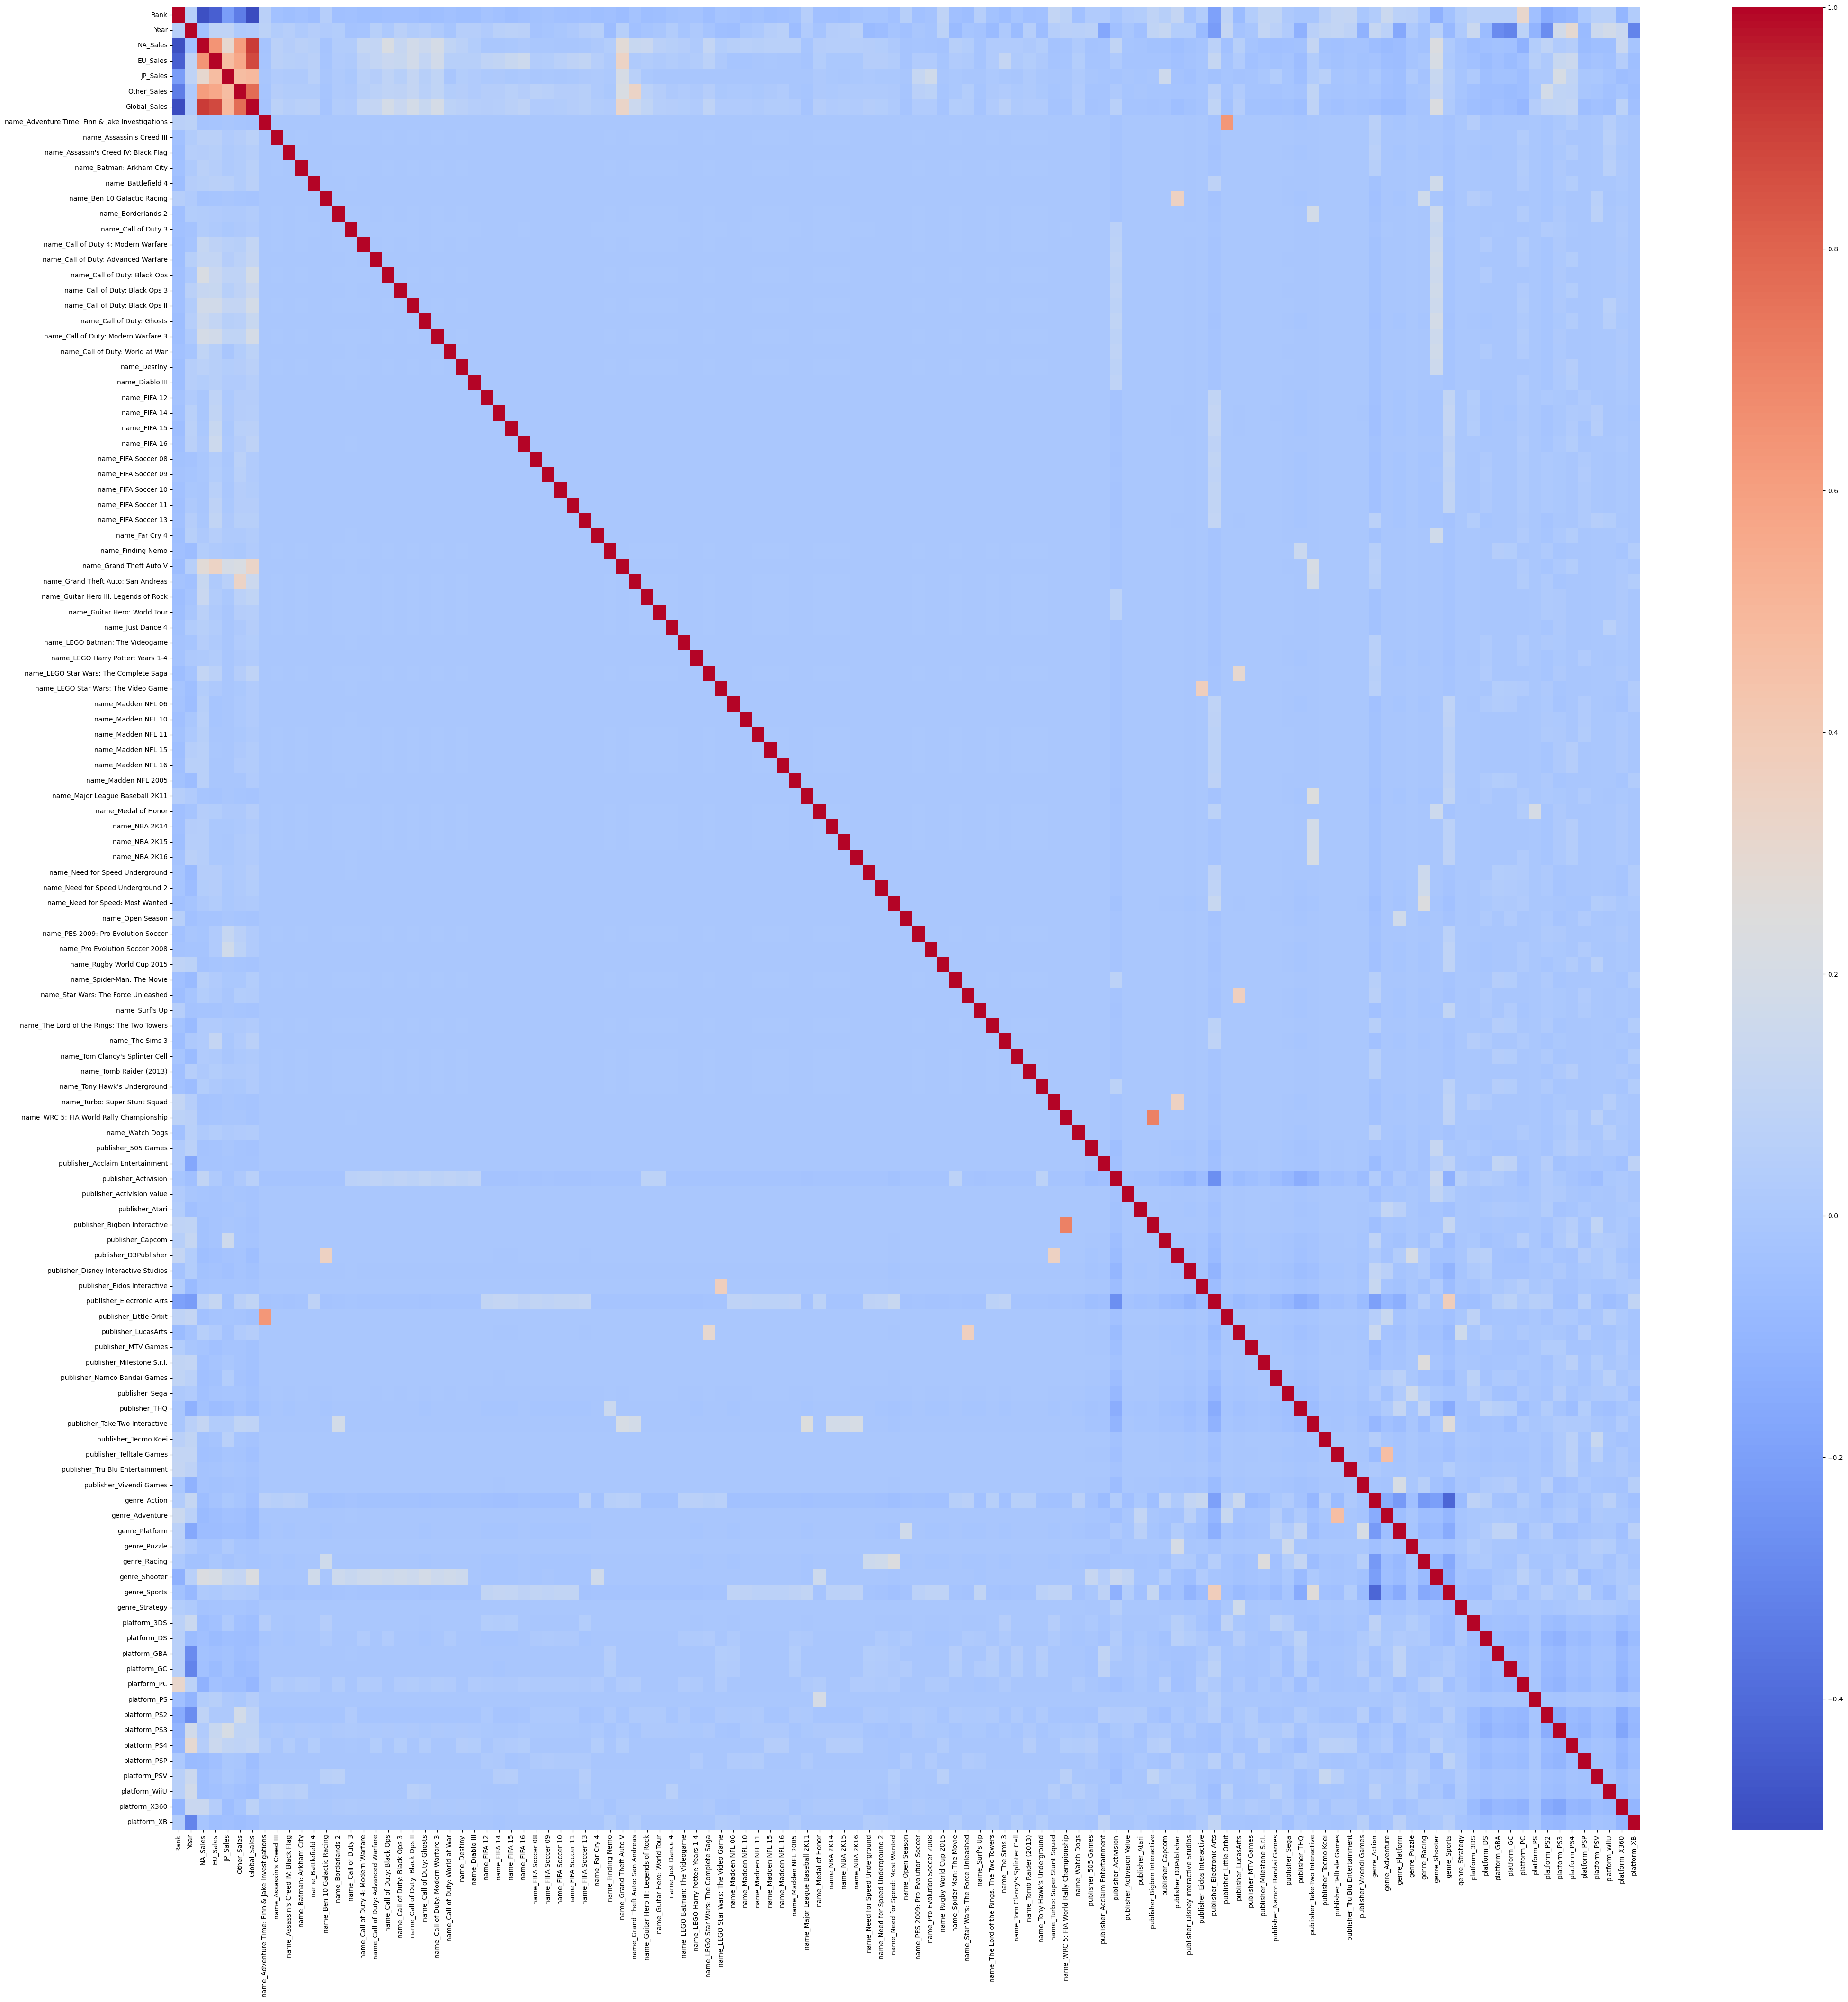

In [268]:
plt.figure(figsize=(50,50))
sns.heatmap(game_data_dropped.corr(), annot=False, cmap='coolwarm')

## Split data into training and testing data

In [269]:
train_df, test_df = train_test_split(game_data, test_size=0.2)

In [270]:
train_df

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,name_007: Quantum of Solace,name_2010 FIFA World Cup South Africa,name_AC/DC LIVE: Rock Band Track Pack,...,platform_PS2,platform_PS3,platform_PS4,platform_PSP,platform_PSV,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
9579,9581,2002.0,0.10,0.03,0.0,0.00,0.13,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2284,2286,2009.0,0.52,0.26,0.0,0.12,0.91,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2808,2810,2014.0,0.32,0.34,0.0,0.07,0.73,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1760,1762,2014.0,0.51,0.54,0.0,0.10,1.16,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8083,8085,2010.0,0.10,0.06,0.0,0.02,0.18,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,4615,2005.0,0.39,0.00,0.0,0.03,0.42,False,False,False,...,False,False,False,True,False,False,False,False,False,False
7879,7881,2010.0,0.18,0.00,0.0,0.01,0.19,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13950,13952,2016.0,0.03,0.00,0.0,0.00,0.04,False,False,False,...,False,False,False,False,False,False,False,False,False,True
11353,11355,2006.0,0.06,0.02,0.0,0.00,0.08,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [271]:
test_df

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,name_007: Quantum of Solace,name_2010 FIFA World Cup South Africa,name_AC/DC LIVE: Rock Band Track Pack,...,platform_PS2,platform_PS3,platform_PS4,platform_PSP,platform_PSV,platform_Wii,platform_WiiU,platform_X360,platform_XB,platform_XOne
4593,4595,2003.0,0.21,0.16,0.00,0.05,0.42,False,False,False,...,True,False,False,False,False,False,False,False,False,False
965,967,2010.0,1.41,0.21,0.03,0.16,1.80,False,False,False,...,False,True,False,False,False,False,False,False,False,False
11993,11995,2015.0,0.00,0.05,0.00,0.01,0.07,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13499,13501,2012.0,0.00,0.04,0.00,0.01,0.04,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8939,8941,2000.0,0.08,0.06,0.00,0.01,0.15,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3222,3224,2012.0,0.20,0.37,0.00,0.06,0.63,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2224,2226,2012.0,0.42,0.41,0.00,0.11,0.93,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2312,2314,2007.0,0.74,0.03,0.01,0.12,0.90,False,False,False,...,True,False,False,False,False,False,False,False,False,False
662,664,2010.0,2.04,0.15,0.00,0.19,2.38,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [272]:
X_train = train_df.drop('Global_Sales', axis=1)
y_train = train_df['Global_Sales']
X_test = test_df.drop('Global_Sales', axis=1)
y_test = test_df['Global_Sales']

## Create Model

In [273]:
# Random Forest Regressor
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

## Visualize Data

In [274]:
forest.score(X_test, y_test)

0.9604841331074992

In [275]:
y_train_pred = forest.predict(X_train)

In [277]:
mse_train = metrics.mean_squared_error(y_train, y_train_pred)
error_score = metrics.r2_score(y_train, y_train_pred)
print("Mean squared error: ", mse_train)
print("R squared error: ", error_score)

Mean squared error:  0.0033000144472616886
R squared error:  0.9981528953571875


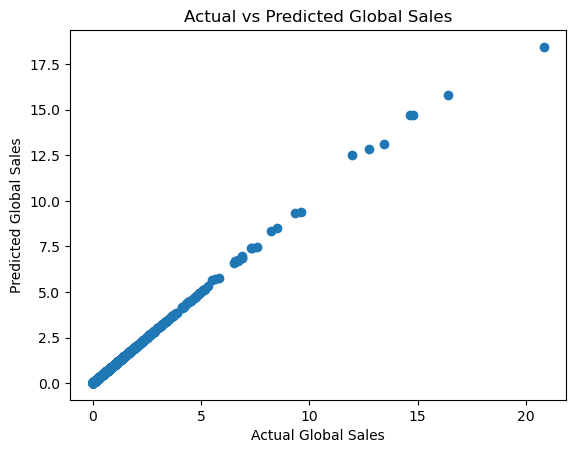

In [278]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales")
plt.show()

In [279]:
y_test_pred = forest.predict(X_test)

In [280]:
mse_test = metrics.mean_squared_error(y_test, y_test_pred)
error_score = metrics.r2_score(y_test, y_test_pred)
print("Mean squared error: ", mse_test)
print("R squared error: ", error_score)

Mean squared error:  0.1164857298582991
R squared error:  0.9604841331074992


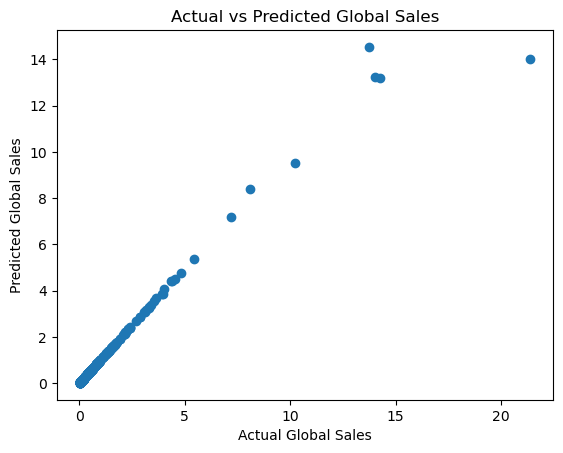

In [281]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Actual vs Predicted Global Sales")
plt.show()

## Visualize Actual and Predicted Data in a DataFrame

In [283]:
# Visualize Trained Data in a DataFrame
predictions_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred})
print(predictions_df)

       Actual  Predicted
9579     0.13     0.1300
2284     0.91     0.9100
2808     0.73     0.7300
1760     1.16     1.1599
8083     0.18     0.1800
...       ...        ...
4613     0.42     0.4200
7879     0.19     0.1900
13950    0.04     0.0400
11353    0.08     0.0800
5071     0.38     0.3800

[1972 rows x 2 columns]


In [284]:
# Visualize Test Data in a DataFrame
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
print(predictions_df)

       Actual  Predicted
4593     0.42     0.4200
965      1.80     1.7977
11993    0.07     0.0700
13499    0.04     0.0400
8939     0.15     0.1500
...       ...        ...
3222     0.63     0.6300
2224     0.93     0.9318
2312     0.90     0.8970
662      2.38     2.3728
7572     0.20     0.2000

[494 rows x 2 columns]
